
# Investigation of the Dataset: No-show Medical Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I am goint to investigate the **No-show appointments** dataset, which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

This dataset does not have many variables, so it will be necessary to make good use of all of them in order to answer as many questions as we can. Let's take a look at out Data Dictionary:
  
**Independent variables:**
><li> PatientId: Identification of a patient
><li> AppointmentID: Identification of each appointment
><li> Gender: Male or Female . Female is the greater proportion
><li> ScheduledDay: The day of the actuall appointment, when they have to visit the doctor.
><li> AppointmentDay: The day someone called/registered the appointment.
><li> Age: How old is the patient.
><li> Neighborhood: here the appointment takes place.

>**Categorical variables** *(True or False)*:

><li> Scholarship: indicates if the patient is enrolled in Brasilian welfare Bolsa Familia.
><li> Hypertension: indicates if the patient has hypertension
><li> Diabetes: indicates if the patient has diabetes
><li> Alcoholism: indicates if the patient is an alcoholic
><li> Handcap: indicates if the patient is handicapped
><li> SMS_received: 1 or more messages sent to the patient

**Dependent variable:**

><li> No-show: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
    

### Questions:

Every hospital would love to predict whether a patient will show up or not, as this would optimize appointments with the doctor allowing more patients to be attended during the day and reducing the waiting time in the hospital.

  - **Question 1:** What is the proportion of patients who showed up and did not showed up?
  - **Question 2:** What is the patient age distribution of shows versus no_shows?

  - **Question 3:** Is there a relationship between the gender and the Appointment status?
  - **Question 4:** Is there a relationship between being involved in a scholarship and the status of the appointment?
  - **Question 5:** Is there a relationship between the patient health designation and the status of the appointment?
  - **Question 6:** Top 10 neighborhoods with the highest number of no-show ups?
  - **Question 7:** Is there a specific day of the week in which more not show ups occur?
  - **Question 8:** Does the waiting days period of time affect the status of the appointment?
 

  

<a id='wrangling'></a>
## Data Wrangling & Data Cleaning

**I am going to clean the data as I wrangle it**

Data loading, observations, check for cleanliness and trim / clean of the dataset. 

### General Properties

In [110]:
# Import statements for all of the packages that I am going to use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [111]:
# Load data to a dataframe and visualize the first lines
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [112]:
# Get information about the shape of the dataframe
df.shape

(110527, 14)

- There are 110527 records and 14 columns in the dataset.

### Observations & Data Cleaning Process

**Step 1:** Check the column names to see if we have to rename them:

In [113]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [114]:
# Let's rename some columns to make it easier to read and nicer
df.rename(columns={'PatientId':'Patient_Id',
                   'AppointmentID':'Appointment_ID',
                   'ScheduledDay':'Scheduled_Day',
                   'AppointmentDay':'Appointment_Day',
                   'No-show':'No_Show'},inplace=True)

**Step 2:** Get information about the variables in the dataframe and make changes if necessary

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_Id         110527 non-null float64
Appointment_ID     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null object
Appointment_Day    110527 non-null object
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hipertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handcap            110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we can see in the previous query, there are **no missing values** in the dataset. 

Although, some variable type changes are necessary:

- Patient_Id to **int**
- Scheduled_Day and Appointment_ID to **datetime**

In [116]:
# We want to get rid of the float type and convert the Patient_ID to int64, also in
# order to operate with the '...Day' columns, we need to change its type to datetime.

df['Patient_Id']=df['Patient_Id'].astype('int64')
df['Scheduled_Day']=pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day']=pd.to_datetime(df['Appointment_Day'])

df.head(6)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No


>**Create new columns** 

- We won't be able to use the time of the appointment day, since it looks like they are marked as 00:00:00
- It'll be helpfull for further studies if we create a new column showing how long the patient has been waiting for the medical appointment


In [117]:
# Create the new column Waiting_Days

df['Waiting_Days'] = (df.Appointment_Day-df.Scheduled_Day).dt.days
df.Waiting_Days

0         -1
1         -1
2         -1
3         -1
4         -1
5          1
6          1
7          1
8         -1
9          1
10         1
11         2
12         0
13         0
14         0
15         2
16         0
17         0
18         2
19        -1
20         1
21         1
22         3
23         0
24        -1
25         2
26        -1
27         1
28        -1
29        -1
          ..
110497    -1
110498    -1
110499    -1
110500    -1
110501    -1
110502    -1
110503    -1
110504    -1
110505    -1
110506    -1
110507    -1
110508    -1
110509    -1
110510    -1
110511    -1
110512    -1
110513    -1
110514    -1
110515     1
110516     0
110517    -1
110518    40
110519    40
110520    34
110521    34
110522    34
110523    34
110524    40
110525    40
110526    40
Name: Waiting_Days, Length: 110527, dtype: int64

In [118]:
df.head(2)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,Waiting_Days
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1


Since the time in the Appointment_Day column doesn't show, for those appointments that took time on the same day as they weere scheduled, it shows -1 days of waiting. Therefore, we must replace the -1 with 0 days of waiting.


In [119]:
df.Waiting_Days.replace(-1,0,inplace=True)
df.head(2)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,Waiting_Days
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0


- It will also be useful to show the weekday in which the appointment takes place, so let's create a new column for it:

In [120]:
# Create the new column Appointment_weekday
df['Appointment_Weekday'] = (df.Appointment_Day).dt.weekday_name

#Check shows up and no shows up per weekday
df.groupby('Appointment_Weekday')['No_Show'].value_counts()

Appointment_Weekday  No_Show
Friday               No         14982
                     Yes         4037
Monday               No         18025
                     Yes         4690
Saturday             No            30
                     Yes            9
Thursday             No         13909
                     Yes         3338
Tuesday              No         20488
                     Yes         5152
Wednesday            No         20774
                     Yes         5093
Name: No_Show, dtype: int64



**Step 3:** Check if there are any duplicated rows:

In [121]:
sum(df.duplicated())

0

- There are **no duplicated rows.**

**Step 4:** Let's get some statistical data for each column:

In [122]:
df.describe()

,Patient_Id,Appointment_ID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_Days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.532603
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.027834
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


- The average patients age is 37 years old
- 75% of the patients received an SMS
- The average of waiting days for the appointment can be rounded to 10 days (75% of the patients waited 14 days for the Appointment and 50% waited up to 3 days). 
- We can already see **some errors in the data**:
> 1. **The minimum age is -1**, therefore we will have to get rid of this row or change replace it by the mean age which we can see is 37 years. But before we do that, lets take a look at that particular patient:
> 2. The are still **negative waiting days**, as this is impossible, we will have to fix this ploblem


**Fix the errors:**

1. Age = -1:

In [123]:
df.query('Age == "-1"')

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,Waiting_Days,Appointment_Weekday
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0,Monday


As no particular characteristic gives you any hint on how old the patient could be, **let's drop that row** and make sure there aren't any more errors on the age:

In [124]:
# drop the row with Age = -1
df.drop(df[df['Age'] == -1].index, inplace =True)

In [125]:
# Check if there are more Ages with error values
df.query('Age < 0')

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,Waiting_Days,Appointment_Weekday


- There are no more rows with invalid age values.

2. Negative waiting days:

In [126]:
# Check the data related to negative waiting days:

neg_waiting_days = df.query('Waiting_Days < 0')
neg_waiting_days

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,Waiting_Days,Appointment_Weekday
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-2,Monday
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-2,Tuesday
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-2,Wednesday
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-7,Thursday
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-2,Tuesday


In [127]:
neg_waiting_days.describe()

,Patient_Id,Appointment_ID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Waiting_Days
count,5.000000e+00,5.000000e+00,5.000000,5.0,5.0,5.0,5.0,5.000000,5.0,5.000000
mean,2.084014e+14,5.680573e+06,33.400000,0.0,0.0,0.0,0.0,0.400000,0.0,-3.000000
std,4.415985e+14,2.309557e+04,28.814927,0.0,0.0,0.0,0.0,0.547723,0.0,2.236068
min,3.787482e+12,5.655637e+06,7.000000,0.0,0.0,0.0,0.0,0.000000,0.0,-7.000000
25%,7.839273e+12,5.664962e+06,19.000000,0.0,0.0,0.0,0.0,0.000000,0.0,-2.000000
50%,7.896294e+12,5.679978e+06,22.000000,0.0,0.0,0.0,0.0,0.000000,0.0,-2.000000
75%,2.425226e+13,5.686628e+06,38.000000,0.0,0.0,0.0,0.0,1.000000,0.0,-2.000000
max,9.982316e+14,5.715660e+06,81.000000,0.0,0.0,0.0,0.0,1.000000,0.0,-2.000000


All the errors (with a mean of -3 in the waiting days) happened on May 2016 and at different Neighbourhoods (except for 2 cases at the Santo Antonio Neighbourhood), 2 of the patients are handicapped and their average age is 33 years old.

- As we cannot relate the error to any of this data, we will drop these rows, since they don't represent a high percentage (0.0045%) of the total data volume.

In [128]:
# drop the rows with negative waiting days:
df.drop(df[df['Waiting_Days'] < 0].index, inplace =True)

# Check they are dropped
df.query('Waiting_Days < 0')

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,Waiting_Days,Appointment_Weekday


**Step 5:** Check if there are several rows for the same patient and appointment:

In [129]:
sum(df.Patient_Id.duplicated()), sum(df.Appointment_ID.duplicated())

(48223, 0)

- There are no dupplicated Appointment_ID values (which would be an error)
- There are 48228 patients for whom we have data from different appointments, so let's check these out:

In [130]:
#Create a table for all the duplicated patients
duplc_patients=df[df.Patient_Id.duplicated()==True]

In [131]:
# select top 10 patients who scheduled appointments more than once 
dup=duplc_patients['Patient_Id'].value_counts().iloc[0:10]
print('Top 10 patients who scheduled appointments more than once:\n\n{}'.format(dup))

Top 10 patients who scheduled appointments more than once:

822145925426128    87
99637671331        83
26886125921145     69
33534783483176     64
75797461494159     61
6264198675331      61
258424392677       61
871374938638855    61
66844879846766     56
872278549442       54
Name: Patient_Id, dtype: int64


In [132]:
# Get the first and last date in out dataset for which an appointment was scheduled
first_date_sch=df.sort_values(by='Scheduled_Day', ascending=True, inplace=False).Scheduled_Day.head(1)
last_date_sch=df.sort_values(by='Scheduled_Day', ascending=True, inplace=False).Scheduled_Day.tail(1)
print('First day an appointment was scheduled:{}'.format(first_date_sch))
print('Last day an appointment was scheduled:{}'.format(last_date_sch))

First day an appointment was scheduled:3764   2015-11-10 07:13:56
Name: Scheduled_Day, dtype: datetime64[ns]
Last day an appointment was scheduled:87223   2016-06-08 20:07:23
Name: Scheduled_Day, dtype: datetime64[ns]


In [133]:
# Get the firstand last date in out dataset for the appointments 
first_date_app=df.sort_values(by='Appointment_Day', ascending=True, inplace=False).Appointment_Day.head(1)
last_date_app=df.sort_values(by='Appointment_Day', ascending=True, inplace=False).Appointment_Day.tail(1)
print('First appointment day:{}'.format(first_date_app))
print('Last appointment day:{}'.format(last_date_app))

First appointment day:0   2016-04-29
Name: Appointment_Day, dtype: datetime64[ns]
Last appointment day:91900   2016-06-08
Name: Appointment_Day, dtype: datetime64[ns]


Therefore, there are patients that scheduled more than 60 appointments in less than a month and a half. As there are too many of these to just take them as an error in the data, I will assume that a patient who must attend different specialists appointments, attends all of them the same day and the system creates different records for each specialist visit.

<a id='eda'></a>
## Exploratory Data Analysis

First of all, I would like to get a quick histogram view of all of the different variables and try to get some observations.

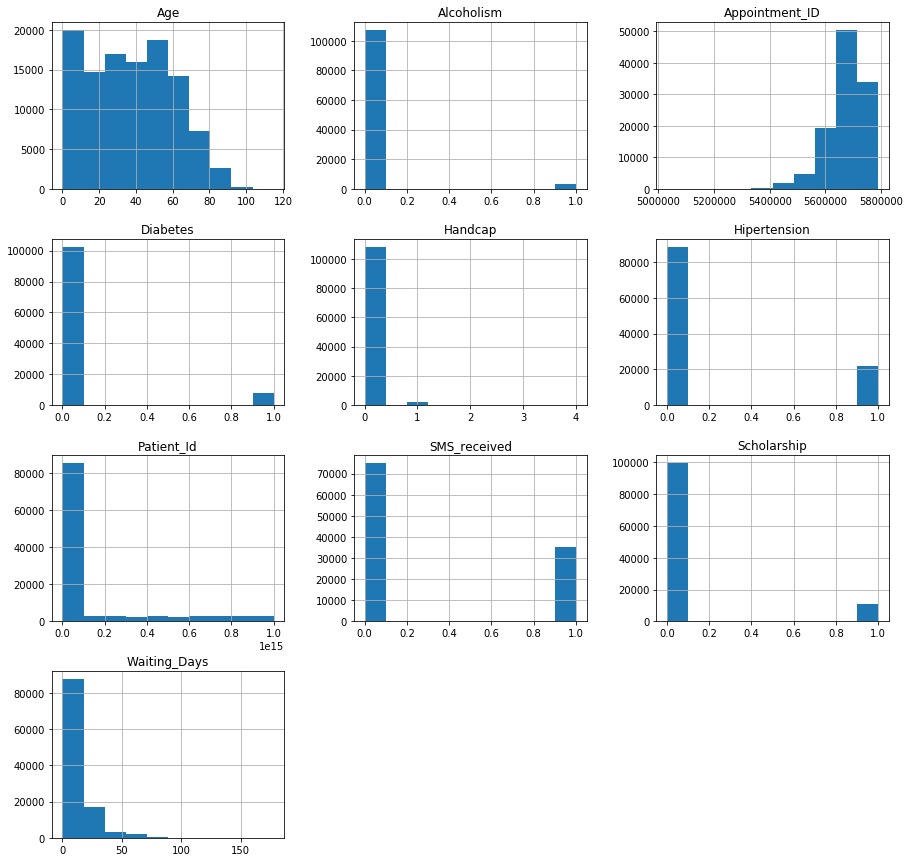

In [134]:
df.hist(figsize=(15,15));

**Observations:**

- The sample of young-adult patients is more representative than that of patients older than 60, reaching the peak of representation in infants.
- A very small sample of patients is represented by alcoholic, diabetics or handicapped patients.
- There are fewer patients who did not receive a reminder SMS for their appointment than patients who did receive one.

Secondly, I am going to create a mask for our dependent variable so that I can see the correlations with the different independent variables.

In [135]:
#Create a mask
shows = df['No_Show'] == 'No'
no_shows = df['No_Show'] == 'Yes'

From now on, in order to get better insights on the data, I am going to create **contingency tables** (used in statistics to summarize the relationship between several categorical variables) using  the crosstab function to see the results in proportion.

Also, to make sure if a relationship exist or not between variables and answer the question: "is it statistically significant?" I am going to conduct a **Chi-Square Test** on each contingency tables. Therefore, if I obtain a small Chi-Square value, that means the correlation between my two variables is very little, while if I obtain a larger value, it'll mean that there is a correlation between my two variables.

>I stablish my significance level at 95%:

>- If p ≤ 0.05 --> Statistically significant - indicates strong evidence against the null hypothesis, so I reject the null hypothesis.
>- If p > 0.05 --> Not statistically significant - indicates weak evidence against the null hypothesis, so I fail to reject the null hypothesis.

### Question 1: 
>### What is the proportion of patients who showed up and did not showed up?

In [136]:
# Count the number of patients who showed up and did not showed up 
# as well as the total number of patients
No_Show_counts=df.groupby('No_Show').count()['Patient_Id']
No_Show_total=df.count()['Patient_Id']

In [137]:
# Get proportion of appointment shows versus no shows
showsup=No_Show_counts.iloc[0]/No_Show_total
noshowsup=No_Show_counts.iloc[1]/No_Show_total
No_Show_prop=[showsup,noshowsup]
No_Show_prop

[0.79810171822549558, 0.20189828177450439]

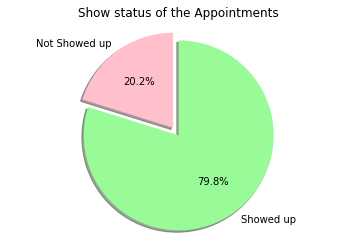

In [138]:
# Plot a Pie chart with Appointment status (showed up - not showed up)

labels = ['Not Showed up', 'Showed up']
sizes = [noshowsup, showsup]
colors = ['pink', 'palegreen']
explode = (0.1, 0) # only "explode" the Not Showed up slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Show status of the Appointments')
plt.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle.

The majority of appointment status are **show up (79.8%)**, while those marked as **not show up** represent only the **20.2%** of the total number of records.


### Question 2: 
>### What is the patient age distribution of shows versus no_shows?


In [139]:
#Create a contingency table: age vs. No-show to check the difference for all ages
age_vs_no_show = pd.crosstab(index = df['Age'], columns = df['No_Show'], normalize = 'index') #With normalize='index’ we normalize over each row.
age_vs_no_show.head()

No_Show,No,Yes
Age,,
0,0.819441,0.180559
1,0.817422,0.182578
2,0.844252,0.155748
3,0.816920,0.183080
4,0.782910,0.217090


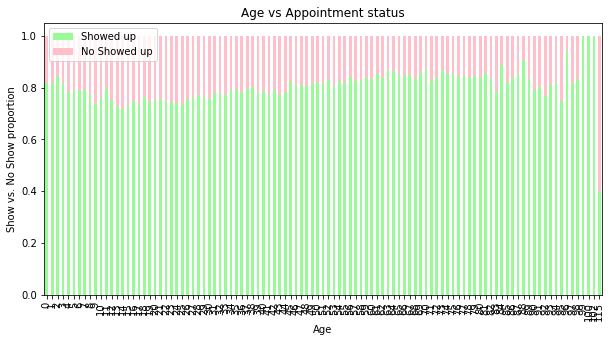

In [140]:
# Plot a histogram chart Age vs. Appointment status (showed up - not showed up)

colors = ['palegreen','pink']

age_vs_no_show.plot(kind='bar', stacked=True, color=colors, figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Show vs. No Show proportion')
plt.title('Age vs Appointment status')
L=plt.legend()
L.get_texts()[0].set_text('Showed up')
L.get_texts()[1].set_text('No Showed up')


- We can see in the chart above that **patients whose age is above 60 take appointment more seriously** than patients under that age.
- Patients **between 9 and 45 years old** are those that represents a **greater proportion of no showed up appointmens.** 


In [141]:
# Average ages for different show status
df.groupby('No_Show')['Age'].mean()

No_Show
No     37.790504
Yes    34.317872
Name: Age, dtype: float64

The mean for patients who showed up can be rounded to 38 and for the patients that did not showed up can be rounded to 34.

### T-Test
#### Age vs No shows up

In this case, as we have calculated the means, we are goint to conduct the T-Test, which is used to compare means between two groups of a small sample size and tell you if they are different from each other and let you know if those differences could have happened by chance.

In [142]:
# Import the package needed
import scipy

In [143]:
# Create columns for shows and no_whows ages
shows_age = df[df.No_Show == 'No'].Age
no_shows_age = df[df.No_Show == 'Yes'].Age

In [144]:
# Perform the T-Test
ttest_results = scipy.stats.ttest_ind(shows_age, no_shows_age)
ttest_results

Ttest_indResult(statistic=20.089465024413947, pvalue=1.3200839802166723e-89)

A statistical hypothesis test determines whether there is a statistically significant relationship between the data. The null hypothesis (considered the default in the test experiment) states that there is no meaningful relationship while the alternative hypothesis states the opposite.

As we can see in our output, the p-value is notoriously small. This shows evidences against the null hypothesis, therefore, I am going to reject it and assume that **there is a meaningful relationship between the age and the appointment status.**

### Question 3:  
>### Is there a relationship between the gender and the Appointment status?

In [145]:
#Create a contingency table: Gender vs. No-show
gender_vs_no_show = pd.crosstab(index = df['Gender'], columns = df['No_Show'], normalize = 'index') #With normalize='index’ we normalize over each row.
gender_vs_no_show.head()

No_Show,No,Yes
Gender,,
F,0.796885,0.203115
M,0.800362,0.199638


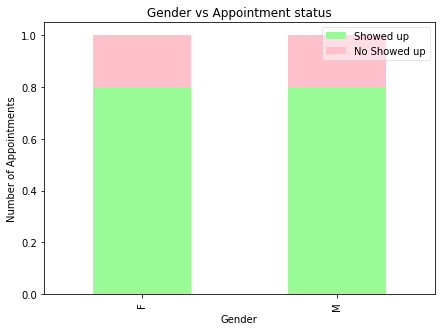

In [146]:
# Plot a histogram chart Gender vs. Appointment status (showed up - not showed up)

colors = ['palegreen','pink']

gender_vs_no_show.plot(kind='bar', stacked=True, color=colors, figsize=(7,5))
plt.xlabel('Gender')
plt.ylabel('Number of Appointments')
plt.title('Gender vs Appointment status')
L=plt.legend(fancybox=True, framealpha=0.5)
L.get_texts()[0].set_text('Showed up')
L.get_texts()[1].set_text('No Showed up')

As we can see from the plot, there is not a lot of difference on the appointment status based on the patient gender.

### Chi-Square Test
#### Gender vs No shows up

In [147]:
from scipy.stats import chi2_contingency

In [148]:
#Conduct the Chi-Square Test(chi2), showing the p (p-value), dof(degrees of freedom) and ex(expected frequencies)
chi2, p, dof,ex = chi2_contingency(gender_vs_no_show, correction=False)
chi2, p

(3.7593240074497538e-05, 0.99510793499224592)

The p-value is greater than 0.05% (0.99%), therefore, I am going not going to assume that **there is NOT a meaningful relationship between the gender and the appointment status.**

### Questions 4 & 5:  
>### Is there a relationship between being involved in a scholarship and the status of the appointment?
>### Is there a relationship between the patient health designation and the status of the appointment?

Our **categorical variables** are: scholarship, Hypertension, Diabetes,  Alcoholism, Handcap, SMS_received and No_Show.

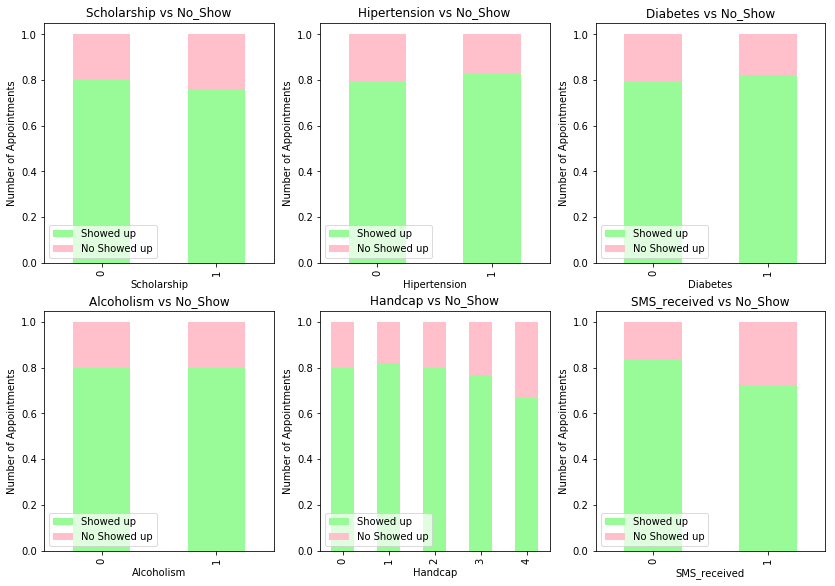

In [149]:
#Create a list with all the categorical variables
cat_var = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

# multiple line plot
fig=plt.figure(figsize=(14,15))
for i, var in enumerate(cat_var):
    ax = fig.add_subplot(3, 3, i+1)
    # Add title and labels
    ax.set_title(var + ' vs No_Show')
    ax.set_xlabel(var)
    ax.set_ylabel('Number of Appointments')
    # Plot the proportions
    pd.crosstab(index = df[var], columns = df['No_Show'], normalize = 'index').plot(ax=ax, kind='bar', stacked=True, color=['palegreen','pink'])
    # Modify legends
    L=plt.legend(fancybox=True, framealpha=0.7, loc=3)
    L.get_texts()[0].set_text('Showed up')
    L.get_texts()[1].set_text('No Showed up');

In general, there is not a big difference between both appointment status (show / no-show) due to the health designation. What is very remarkable, in my opinion, is that in proportion, there are **more patients who did not attend the appointment and got a reminder SMS than those who did not attend it without having received it.**

### Chi-Square Test
#### Categorical variables vs No shows up

In [150]:
#Create a list with all the categorical variables
cat_var_chi2_test = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']


#Conduct the Chi-Square Test(chi2), showing the p (p-value), dof(degrees of freedom) and ex(expected frequencies)
# multiple chi-square test
for i, result in enumerate(cat_var_chi2_test):
    chi2, p, dof,ex = chi2_contingency(pd.crosstab(index = df[result], columns = df['No_Show']), correction=False)

    print(p)



3.13149499541e-22
2.00724179106e-32
4.6773921245e-07
0.952033520537
0.112251011129
0.0


The Chi-Square Test p values are:

    - p value for Scholarship: 3.13149499541e-22 
    - p value for Hipertension: 2.00724179106e-32
    - p value for Diabetes: 4.6773921245e-07
    - p value for Alcoholism: 0.952033520537
    - p value for Handcap: 0.112251011129
    - p value for SMS_received: 0.0
    
Therefore: 

- There is a **meaningful relationship** between the independent variables **Scholarship**, **Hipertension**, **Diabetes** and **SMS_received** with our dependent variable Appointment status (No_Show)

- There is **NOT a meaningful relationship** between the independent variables **Alcoholism** and **Handcap** with our dependent variable Appointment status (No_Show)

### Question 6:  
>### Top 10 neighborhoods with the highest number of no-show ups?

In [151]:
# Top 10 neighbourhood with NO shows up
hoods_no_show=df.Neighbourhood[no_shows].value_counts().head(10)
hoods_no_show

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           905
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            572
BONFIM                550
Name: Neighbourhood, dtype: int64

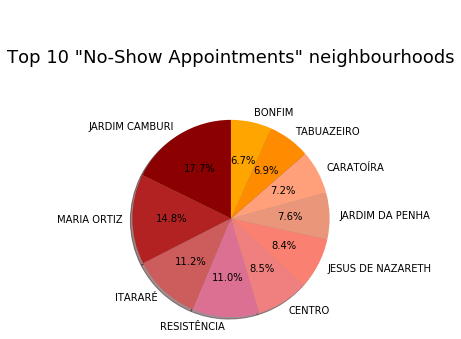

In [152]:
# Plot a Pie chart with Appointment status (showed up - not showed up)

labels = ['JARDIM CAMBURI','MARIA ORTIZ','ITARARÉ','RESISTÊNCIA',
          'CENTRO','JESUS DE NAZARETH','JARDIM DA PENHA','CARATOÍRA',
          'TABUAZEIRO','BONFIM']

colors = ['darkred', 'firebrick','indianred','palevioletred','lightcoral',
          'salmon','darksalmon','lightsalmon','darkorange','orange']

plt.pie(hoods_no_show, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.title('\n\nTop 10 "No-Show Appointments" neighbourhoods\n\n',fontsize=18)
plt.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle.

### Question 7:  
>### Is there a specific day of the week in which more not show ups occur? 

In [153]:
#Number of show ups and no show ups by weekdays
weekdays_vs_NoShow = pd.crosstab(index = df['Appointment_Weekday'], columns = df['No_Show'])
weekdays_vs_NoShow

No_Show,No,Yes
Appointment_Weekday,,
Friday,14982,4037
Monday,18024,4689
Saturday,30,9
Thursday,13909,3337
Tuesday,20488,5150
Wednesday,20774,5092


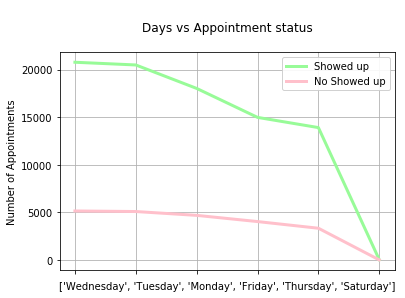

In [154]:
#Plot days vs Show ups and No show ups
days_shows = df['Appointment_Weekday'][shows].value_counts()
days_noshows= df['Appointment_Weekday'][no_shows].value_counts()

Appointment_Weekday=['Wednesday','Tuesday','Monday','Friday','Thursday','Saturday']

days_shows.plot(color='palegreen',linewidth=3.0,grid=.5)
days_noshows.plot(color='pink',linewidth=3.0,grid=.5)
plt.xlabel(Appointment_Weekday)
plt.ylabel('Number of Appointments')
plt.title('\nDays vs Appointment status\n')
L=plt.legend(fancybox=True, framealpha=0.9)
L.get_texts()[0].set_text('Showed up')
L.get_texts()[1].set_text('No Showed up');

We can see from the graph how the curves of show and no-show appointments follow a very similar dynamic throughout the weekdays. **Wednesday is the day with the highest number of no show ups** (also with the highest number of show ups) while **saturday is the day with the lowest number of no show ups** (as well as for the show ups). However, we need to look at the data in proportion.

In [155]:
#Create a table: Appointment_Weekday vs. No-show (to check proportionally)
weekdays_vs_no_show = pd.crosstab(index = df['Appointment_Weekday'], columns = df['No_Show'], normalize = 'index')
weekdays_vs_no_show

No_Show,No,Yes
Appointment_Weekday,,
Friday,0.787739,0.212261
Monday,0.793554,0.206446
Saturday,0.769231,0.230769
Thursday,0.806506,0.193494
Tuesday,0.799126,0.200874
Wednesday,0.803139,0.196861


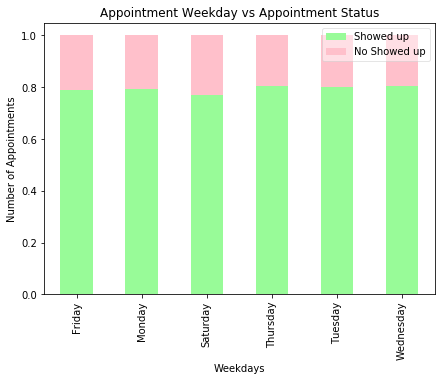

In [156]:
# Plot a histogram chart Appointment_Weekday vs. Appointment status (showed up - not showed up)

colors = ['palegreen','pink']

weekdays_vs_no_show.plot(kind='bar', stacked=True, color=colors, figsize=(7,5))
plt.xlabel('Weekdays')
plt.ylabel('Number of Appointments')
plt.title('Appointment Weekday vs Appointment Status')
L=plt.legend(fancybox=True, framealpha=0.5)
L.get_texts()[0].set_text('Showed up')
L.get_texts()[1].set_text('No Showed up')

From this graph we can conclude that the difference on Saturday might be due to the low number of records for this day, therefore, any Saturday  record represents a greater variation in proportion to the other days.

### Chi-Square Test
#### Appointment Weekday vs No shows up

In [157]:
#Conduct the Chi-Square Test(chi2), showing the p (p-value), dof(degrees of freedom) and ex(expected frequencies)
chi2, p, dof,ex = chi2_contingency(weekdays_vs_no_show, correction=False)
chi2, p

(0.0055810628404305276, 0.99999987646912758)

The p-value is greater than 0.05% (0.99%), therefore, I am going not going to assume that **there is NOT a meaningful relationship between the appointment weekday and the appointment status.**

### Question 8:  
>### Does the waiting days period of time affect the status of the appointment?

In [158]:
df.columns

Index(['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No_Show', 'Waiting_Days', 'Appointment_Weekday'],
      dtype='object')

In [159]:
#Create a contingency table: Appointment_Weekday vs. No-show (to check proportionally)
waiting_days_vs_no_show = pd.crosstab(index = df['Waiting_Days'], columns = df['No_Show'])
waiting_days_vs_no_show

No_Show,No,Yes
Waiting_Days,,
0,40870,2905
1,5123,1602
2,2093,644
3,4059,1231
4,2405,872
5,3036,1001
6,3597,1309
7,1662,670
8,1165,440


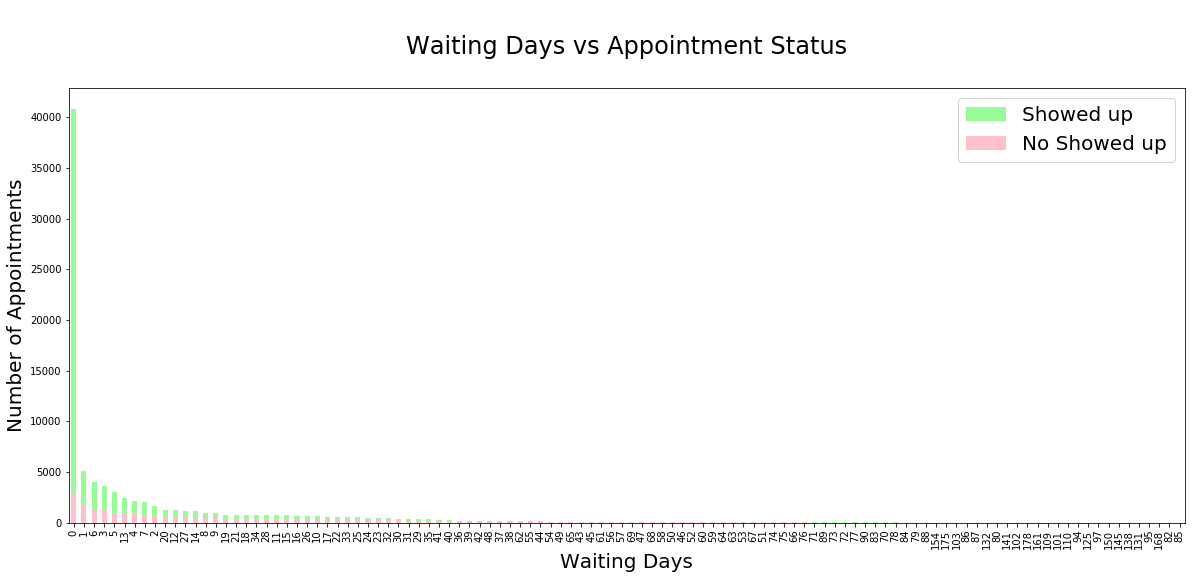

In [160]:
#Plot Waiting Days vs Show ups and No Show ups
waitingdays_shows = df['Waiting_Days'][shows].value_counts()
waitingdays_noshows= df['Waiting_Days'][no_shows].value_counts()

waitingdays_shows.plot(kind='bar', color='palegreen',linewidth=3.0, figsize=(20,10))
waitingdays_noshows.plot(kind='bar', color='pink',linewidth=3.0, figsize=(20,8))
plt.xlabel('Waiting Days',fontsize=20)
plt.ylabel('Number of Appointments',fontsize=20)
plt.title('\nWaiting Days vs Appointment Status\n',fontsize=24)
L=plt.legend(fancybox=True, framealpha=0.9, fontsize=20)
L.get_texts()[0].set_text('Showed up')
L.get_texts()[1].set_text('No Showed up');

The most relevant insight of this plot is that a large majority scheduled the appointment the same days they attended, causing a very positive trend in attendance. **The shorten awaiting period the more patients show up.**

<a id='conclusions'></a>
## Conclusions

1. The majority of appointment status are **show up (79.8%)**, while those marked as **not show up** represent only the **20.2%** of the total number of records.


2. We can see in the chart above that **patients whose age is above 60 take appointment more seriously** than patients under that age.


3. Patients **between 9 and 45 years old** are those that represents a **greater proportion of no showed up appointmens,** while **patients above 60 take 
appointment more seriously**


4. There are **more patients who did not attend the appointment and got a reminder SMS than those who did not attend it without having received it.**


5. The **Top 10 neighborhoods** with the highest number of **no-show ups** are, in order: Jardim Camburi, Maria Ortiz, Itararé, Resistência, Centro, Jesus De Nazareth, Jardim Da Penha, Caratoíra, Tabuazeiro Y Bonfim.


6. **Wednesdays and Tuesdays** are the days with the **highest number of appointments**, while **Thursday and Saturday** are the days with the **least number of appointments**, although there is no significant relationship between the date of the appointment and its final status.


7. **The shorten awaiting period the more patients show up.**


>Variables that show a significant relationship with the status of the appointment according to statistical tests:
>-	Age 
>-	Scholarship
>-	Hipertension
>-	Diabetes
>-	SMS_received



## Limitations

• **The time period over the data is collected is relatively small** (6 months), if we had data referring to a longer period of time we would have drawn conclusions regarding seasonality and the rate of variation over the years.

• **The sample is very unbalanced** since we only have the 20% of records for non-show, which results in a strong limitation of the study of their causes.

• **Limitations of chi-square**: if the test result comes out as a meaningfult relathionship between the variables, that means there is some association but it does not provide further information. 



In [163]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0